In [1]:
import tensorflow as tf 
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print(tf.test.gpu_device_name())

2.0.0
2.2.4-tf
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12232599475934678426
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3141979340
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12183571875188424998
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]
/device:GPU:0


In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

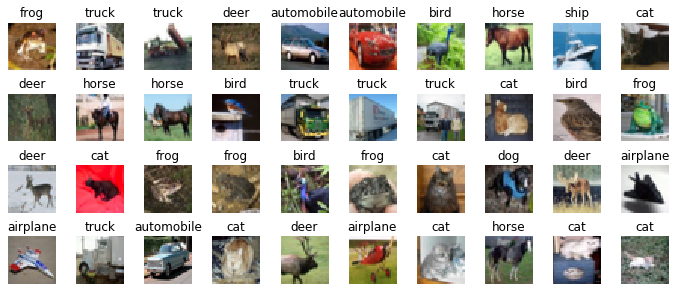

In [3]:
import matplotlib.pyplot as plt

def printImages(images, labels):
    n_rows = 4
    n_cols = 10
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            labels = labels.astype(int)
            labels = labels.reshape(-1)
            plt.imshow(images[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[labels[index]], fontsize=12)
        plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

printImages(X_train, y_train)

In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [5]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 11s 221us/sample - loss: 1.8750 - accuracy: 0.3264 - val_loss: 1.7417 - val_accuracy: 0.3889
Epoch 2/30
50000/50000 [==============================] - 8s 165us/sample - loss: 1.6892 - accuracy: 0.4006 - val_loss: 1.6222 - val_accuracy: 0.4218
Epoch 3/30
50000/50000 [==============================] - 9s 173us/sample - loss: 1.6083 - accuracy: 0.4298 - val_loss: 1.6288 - val_accuracy: 0.4271
Epoch 4/30
50000/50000 [==============================] - 11s 211us/sample - loss: 1.5550 - accuracy: 0.4504 - val_loss: 1.5647 - val_accuracy: 0.4383
Epoch 5/30
50000/50000 [==============================] - 8s 161us/sample - loss: 1.5126 - accuracy: 0.4633 - val_loss: 1.5238 - val_accuracy: 0.4605
Epoch 6/30
50000/50000 [==============================] - 9s 178us/sample - loss: 1.4751 - accuracy: 0.4791 - val_loss: 1.5469 - val_accuracy: 0.4532
Epoch 7/30
50000/50000 [========================

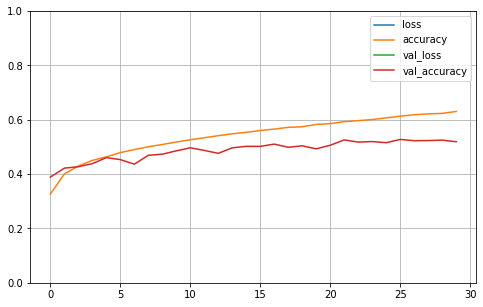

In [7]:
import pandas as pd

def plotTrainingStat(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plotTrainingStat(history)